https://medium.com/swlh/support-vector-machine-from-scratch-ce095a47dc5c
https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)
sns.pairplot(iris, hue="species",palette="bright")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
"""
Since I first want to deal with linearly separable and two-class data, 
I will focus on the graph petal_width-petal_length, for the classes 
Setosa and Versicolor.
"""
df=iris[(iris['species']!='virginica')]
df=df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


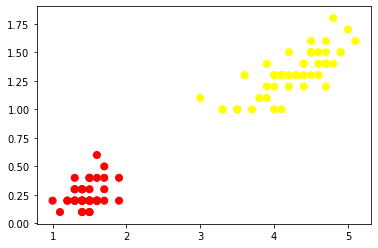

In [3]:
#let's convert categorical values to numerical target
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
X=df.iloc[:,0:2]
y=df['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

In [6]:
from pyod.models.ocsvm import OCSVM
outlier=iris[(iris['species']!='virginica' and iris['species']!='virginica')]
print(outlier)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [26]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

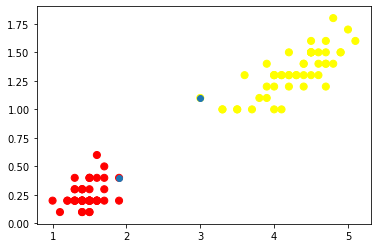

In [27]:
#We can also call and visualize the coordinates of our support vectors:
model.support_vectors_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

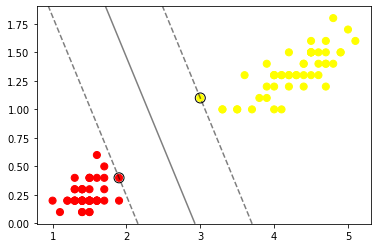

In [36]:
#Now let’s visualize all the elements of our algorithm:
ax = plt.gca() #Get the current Axes instance on the current figure matching the given keyword args, or create one.
#GRAPH INPUTS
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#Return evenly spaced numbers over a specified interval.
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

#Return coordinate matrices from coordinate vectors.
YY, XX = np.meshgrid(yy, xx)

#flatten matrix into array and stack into 2xn then Transpose nx2
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

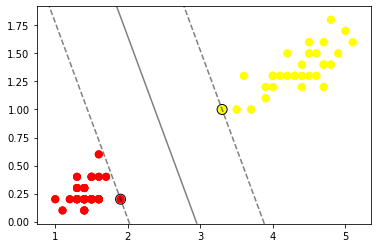

In [38]:
"""
Support Vectors. These points define a very interesting property 
of SVM optimization problem: only a few points actually end up in 
the final solution for creating the vector of parameters w which 
will define the best hyperplane. Hence, every point that is not a 
support vector can be moved anytime you want, 
yet it will not affect our decision boundary parameters.
"""

red_sample=df.sample(frac=0.7)
X=red_sample.iloc[:,0:2]
y=red_sample['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
model.fit(X, y)
#Now let’s visualize all the elements of our algorithm:
ax = plt.gca() #Get the current Axes instance on the current figure matching the given keyword args, or create one.
#GRAPH INPUTS
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#Return evenly spaced numbers over a specified interval.
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

#Return coordinate matrices from coordinate vectors.
YY, XX = np.meshgrid(yy, xx)

#flatten matrix into array and stack into 2xn then Transpose nx2
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### No-Linearly-Separable Data

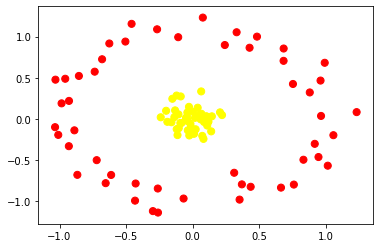

In [39]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

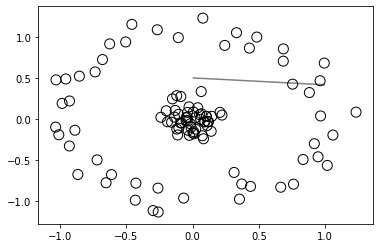

In [40]:
### LINEAR DOESNT FIT
model=SVC(kernel='linear').fit(X, y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

However, if we were able to move from a 2D to a 3D task, we would be able to lift all the yellow points and then use a plan to segregate the two clouds of points:

By doing so, we could separate those two classes with a plan. However, working with 3-dimensions on huge datasets is computationally costly in terms of speed. Furthermore, we should make sure that the elevation function we computed (our r) is the one which best put far apart our two classes.



Text(0.5, 0, 'r')

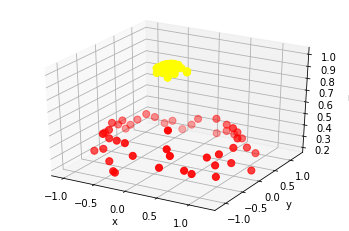

In [42]:
from mpl_toolkits import mplot3d
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

Luckily, we do not need to worry about these pitfalls, we don’t even have to compute the third dimension. It is implicitly done by our SVM algorithm through the kernel trick, and it is done in such a way that the two caveats above are bypassed.
So, if we simply fit our model with kernel=rbf rather than kernel=linear:

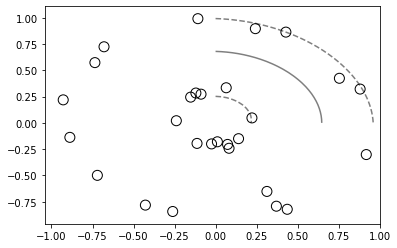

In [45]:
model=SVC(kernel='rbf',gamma='auto').fit(X, y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()